# Projeto - Análise e Visualização de Dados

Em nossas aulas, conhecemos as principais bibliotecas para se trabalhar com Análise e Visualização de Dados em Python. Aprendemos também como trabalhar com tabelas e fazer operações sobre elas, de modo que possamos analisar e inferir sobre uma base de dados existente.

Para este projeto, imagine que o seu chefe disponibilize uma base de dados para que você possa analisá-la a partir dos seus conhecimentos em Python. Para essa tarefa, você deve utilizar o Matplotlib para visualização de alguns gráficos e demais bibliotecas, Pandas e NumPy para análise e manipulação dos dados. Com o correto uso das funcionalidades da linguagem, você será capaz de conduzir de maneira correta, a análise e visualização de dados, trabalho básico de um Cientista de Dados.
Para iniciar o seu projeto, siga as instruções abaixo:

* Faça o download dos arquivos disponibilizados nesta aula e armazene na mesma pasta em que irá armazenar os seus arquivos de código.
* Carregue a tabela .csv para que você possa fazer a leitura de dados da mesma
* Imprima parte do conteúdo para verificar se a leitura está acontecendo corretamente
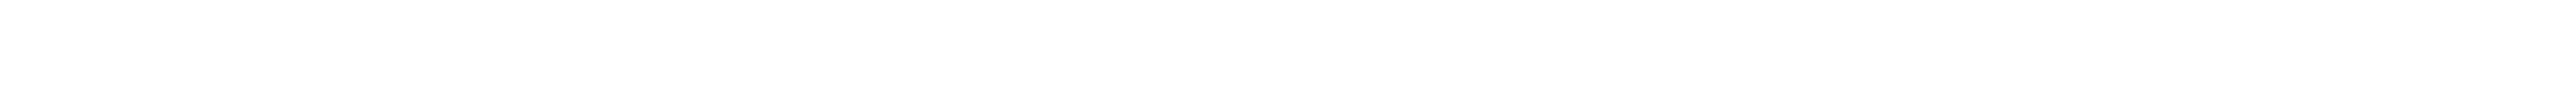



In [1]:
# importa a biblioteca pandas
import pandas as pd
# armazena os dados da tabela em uma estrutura tipo data frame
df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")
# visualizar alguns dados da tabela carregada
df.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


Aí vai uma dica preciosa: Para responder questões relacionadas a frequência de ocorrências, como exemplo, você pode testar o comando a seguir:
         
         df.Região.value_counts()
         
O código acima retorna a quantidade de ocorrências de registros de uma determinada região. Use essa lógica quando necessário.
Em relação as demais questões, consulte diversas fontes, caso necessário, para responder corretamente. Dessa forma, tendo como base o data frame em questão, responda as questões relacionadas:

### Análise de Dados

1. Qual a quantidade de reclamações registradas?
2. Qual é o tempo médio, máximo e mínimo de resposta?
3. Qual é a nota média, máxima e mínima do consumidor?
4. Como podemos correlacionar a nota do consumidor com o tempo de resposta? Explique.
5. Qual a quantidade de reclamações por Sexo?
6. Qual a quantidade de reclamações por Estado?
4. Qual é a porcentagem de reclamações registradas e não respondidas?


In [31]:
# Resposta questão 1: 
n_rec = len(df)
print(f'A quantidade de reclamações registradas foi de {n_rec}')

A quantidade de reclamações registradas foi de 43987


In [24]:
# Resposta questão 2: 

tempo_medio = df['Tempo Resposta'].sum() / df.shape[0]
print(f"Tempo MÉDIO de resposta: {tempo_medio}")

Tempo médio de resposta: 6.3604701389046765


In [26]:
tempo_max = df['Tempo Resposta'].max()
print(f"Tempo MÁXIMO de resposta: {tempo_max}")

Tempo MÁXIMO de resposta: 13.0


In [27]:
tempo_min = df['Tempo Resposta'].min()
print(f"Tempo MÍNIMO de resposta: {tempo_min}")

Tempo MÍNIMO de resposta: 0.0


In [28]:
# Resposta questão 3: 

nota_media = df['Nota do Consumidor'].sum() / df.shape[0]
print(f"A nota MÉDIA do consumidor é {nota_media}")

A nota MÉDIA do consumidor é 1.9569872916998203


In [29]:
nota_max = df['Nota do Consumidor'].max()
print(f"A nota MÁXIMA do consumidor é {nota_max}")

A nota MÁXIMA do consumidor é 5.0


In [30]:
nota_min = df['Nota do Consumidor'].min()
print(f"A nota MÍNIMA do consumidor é {nota_min}")

A nota MÍNIMA do consumidor é 1.0


In [ ]:
# Resposta questão 4: 
A relação é que quanto maior o tempo de resposta, mais baixa é a nota do consumidor.

In [46]:
df.groupby(['Nota do Consumidor','Tempo Resposta'])[['Total']]\
    .count()\
    .pivot_table(index='Nota do Consumidor', columns='Tempo Resposta', values='Total')

Tempo Resposta,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Nota do Consumidor,,,,,,,,,,,,,,
1.0,150.0,461.0,467.0,487.0,495.0,548.0,575.0,819.0,1298.0,1469.0,3050.0,3.0,1.0,2.0
2.0,27.0,87.0,113.0,96.0,92.0,125.0,119.0,166.0,256.0,244.0,549.0,NaN,NaN,NaN
3.0,131.0,241.0,249.0,218.0,236.0,226.0,250.0,346.0,464.0,527.0,850.0,NaN,NaN,NaN
4.0,106.0,352.0,311.0,301.0,323.0,328.0,336.0,430.0,487.0,490.0,837.0,2.0,NaN,NaN
5.0,351.0,773.0,727.0,667.0,651.0,654.0,720.0,858.0,990.0,887.0,1494.0,NaN,NaN,NaN


In [29]:
# Resposta questão 5: 

masc = 0
fem = 0
for dado in df['Sexo']:
    if dado == 'M':
        masc += 1
    else:
        fem += 1

print(f'Reclamações do sexo masculino: {masc}')
print(f'Reclamações do sexo feminino: {fem}')

Reclamações do sexo masculino: 27895
Reclamações do sexo feminino: 16092


In [38]:
# Resposta questão 6:

print('Segue a relação de reclamações por Estado:')
df.UF.value_counts()

Segue a relação de reclamações por Estado:


SP    11882
PR     6140
RJ     4907
MG     4186
BA     2443
RS     1941
DF     1805
PE     1626
SC     1458
MA     1082
ES     1081
CE     1068
MT     1012
GO      886
MS      531
AC      449
PB      343
AM      291
PA      211
RN      160
RO      119
AL      104
SE       97
PI       77
TO       46
RR       24
AP       18
Name: UF, dtype: int64

In [39]:
# Resposta questão 7:

total = df.shape[0]
n_resp = 0
for reclamacao in df['Respondida']:
    if reclamacao == 'N':
        n_resp += 1
    
print(f'O total de reclamações foi {total}, das quais {n_resp} não foram respondidas.')        

O total de reclamações foi 43987, das quais 2026 não foram respondidas.


### Visualização de Dados

Neste momento iremos trabalhar com visualização de dados. Antes de iniciar a impressão dos gráficos, trate de fazer as configurações iniciais para que a impressão ocorra no Jupyter de maneira correta e com todos os requisitos necessários para melhoria da apresentação como um todo. Faça o melhor possível, como se fosse apresentar para o seu chefe. Siga as instruções a seguir:

5. Gere um gráfico com titulo, nome dos eixos, cor e legenda para as seguintes situações:
   * a) Frequência de reclamações por sexo
   * b) Frequencia de reclamações por estado
   * c) Frequência de reclamações respondidas e não respondidas
6. Imagine que você é um Cientista de Dados responsável por medir a satisfação dos clientes. Para que você possa surpreender seu chefe, você deve fazer duas análises importantes sobre o data frame, incluindo no mínimo dois gráficos com suas devidas personalizações de titulo, nome dos eixos, legenda, estilos etc. Considere que, ao trazer informações relevantes para a empresa em que trabalha, mais chances de ter o seu trabalho reconhecido e de ser um profissional com maior valor no mercado. Capriche nos gráficos!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

In [3]:
# Resposta questão 5a: 

masc = 0
fem = 0
for dado in df['Sexo']:
    if dado == 'M':
        masc += 1
    else:
        fem += 1

print(f'Reclamações do sexo masculino: {masc}')
print(f'Reclamações do sexo feminino: {fem}')

Reclamações do sexo masculino: 27895
Reclamações do sexo feminino: 16092


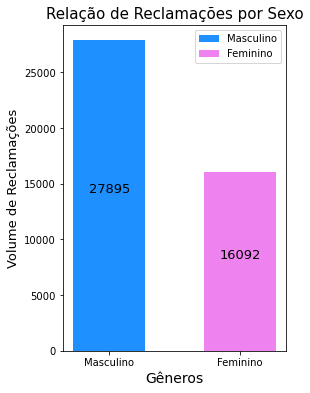

In [70]:
fig = plt.figure()


fig.set_figheight(6)
fig.set_figwidth(4) 


plt.title('Relação de Reclamações por Sexo', fontsize=15)
plt.xlabel('Gêneros', fontsize=14)
plt.ylabel('Volume de Reclamações', fontsize=13)
plt.bar('Masculino', masc, color='dodgerblue', width=0.55)
plt.bar('Feminino', fem, color='violet', width=0.55)
plt.legend(['Masculino', 'Feminino'])

plt.text(0, masc/2, masc, ha='center',va='bottom', fontsize=13)
plt.text(1, fem/2, fem, ha='center',va='bottom', fontsize=13)

plt.show()

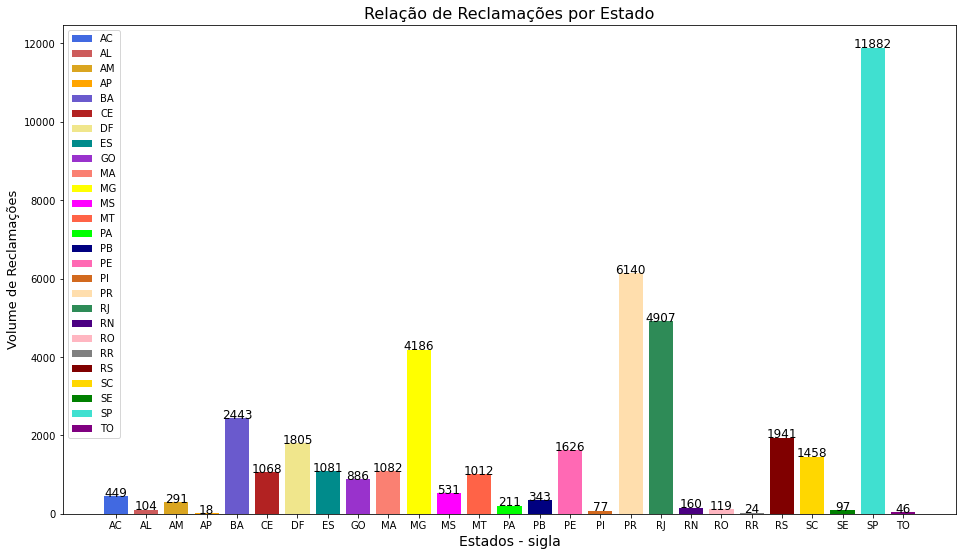

In [26]:
# Resposta questão 5b: 


temp = pd.DataFrame(df.groupby(['UF'])['Total'].count()).reset_index()

estados = list(temp.UF)
reclamacoes =  temp.Total
fig = plt.figure()


cores = ['royalblue', 'indianred', 'goldenrod', 'orange', 'slateblue', 'firebrick', 'khaki', 'darkcyan', 
         'darkorchid', 'salmon', 'yellow', 'fuchsia', 'tomato', 'lime', 'navy', 'hotpink', 'chocolate', 'navajowhite',
         'seagreen', 'indigo', 'lightpink', 'grey', 'maroon', 'gold', 'g', 'turquoise', 'purple']
    
for coluna in range(len(estados)):
        plt.text(coluna, reclamacoes[coluna], reclamacoes[coluna], ha = 'center', fontsize=12)
        plt.bar(estados[coluna], reclamacoes[coluna], color = cores[coluna], label = estados[coluna])
        plt.legend(loc='upper left') 
                
        
plt.xticks(estados)
fig.set_figheight(9)
fig.set_figwidth(16) 
plt.title('Relação de Reclamações por Estado', fontsize=16)
plt.xlabel('Estados - sigla', fontsize=14)
plt.ylabel('Volume de Reclamações', fontsize=13)


plt.show()


In [6]:
# Resposta questão 5c: 

respondidas = 0
nao_respondidas = 0
for resposta in df['Respondida']:
    if resposta in 'Ss':
        respondidas += 1
    else:
        nao_respondidas += 1

print(f'Reclamações respondidas: {respondidas}')
print(f'Reclamações NÃO respondidas: {nao_respondidas}')

Reclamações respondidas: 41961
Reclamações NÃO respondidas: 2026


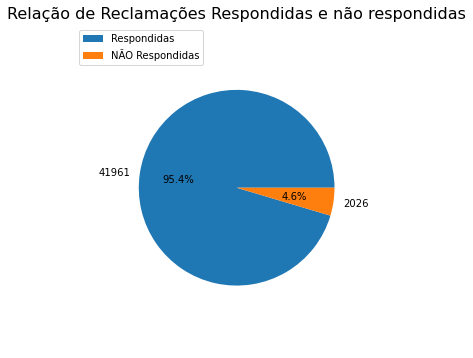

In [74]:
fig = plt.figure()

fig.set_figheight(6)
fig.set_figwidth(6) 

plt.title('Relação de Reclamações Respondidas e não respondidas', fontsize=16)
plt.pie([respondidas, nao_respondidas], labels = [respondidas, nao_respondidas], autopct='%1.1f%%', radius=0.75)
plt.legend(['Respondidas', 'NÃO Respondidas'], loc = 'upper left')
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

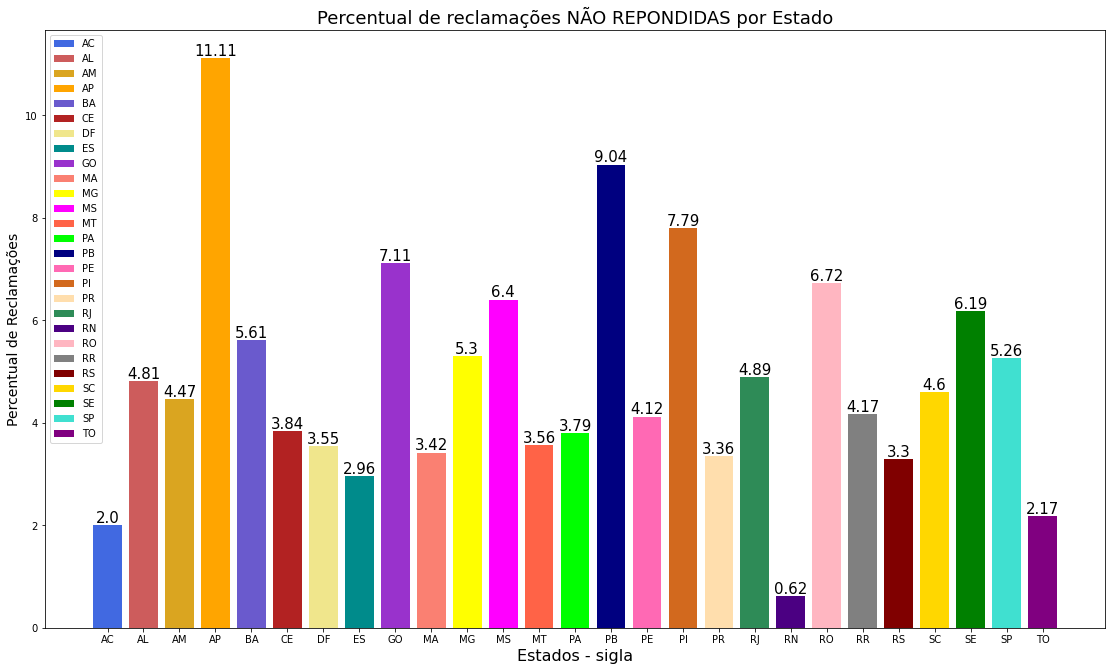

In [10]:
# Resposta questão 6a: 

# Relação do percentual de reclamações não respondidas por estado:

fig = plt.figure()

temp = pd.DataFrame(df.groupby(['UF','Respondida'])['Total'].count()).reset_index()
temp_total = pd.DataFrame(df.groupby(['UF'])['Total'].count()).reset_index()
temp = temp.merge(temp_total, on=['UF']).rename(columns={'Total_x': 'Total', 'Total_y': 'Total_estado'})
temp['Percentual'] = temp['Total'] / temp['Total_estado'] * 100
temp = temp[(temp['Respondida'] == 'N')]

estados = list(temp.UF)
reclamacoes =  list(temp.Percentual)


cores = ['royalblue', 'indianred', 'goldenrod', 'orange', 'slateblue', 'firebrick', 'khaki', 'darkcyan', 
         'darkorchid', 'salmon', 'yellow', 'fuchsia', 'tomato', 'lime', 'navy', 'hotpink', 'chocolate', 'navajowhite',
         'seagreen', 'indigo', 'lightpink', 'grey', 'maroon', 'gold', 'g', 'turquoise', 'purple']
    
for coluna in range(len(estados)):
        plt.text(coluna, reclamacoes[coluna] + 0.05, round(reclamacoes[coluna],2), ha = 'center', fontsize=15)
        plt.bar(estados[coluna], reclamacoes[coluna], color = cores[coluna], label = estados[coluna])
        plt.legend(loc='upper left') 
                
        
plt.xticks(estados)
fig.set_figheight(11)
fig.set_figwidth(19) 
plt.title('Percentual de reclamações NÃO REPONDIDAS por Estado', fontsize=18)
plt.xlabel('Estados - sigla', fontsize=16)
plt.ylabel('Percentual de Reclamações', fontsize=14)


plt.show()

## Laudo 6a: 
### Comparando a quantidade de reclamações por esta VERSUS o número de reclamações não respondidas por estado, chegamos ao percentual de reclamações não respondidas por estado. 

**Podemos Observar que o Amapá (AP), embora não tenha sido o estado que mais recebeu reclamações, foi o estado que menos 
respondeu as reclamações recebidas, em contra partida, São Paulo (SP) que foi onde houve maior número de reclamações, respondeu bem mais que outros estados que receberam menos reclamações como SE, RO, PI, PB, MS, GO, AP.**

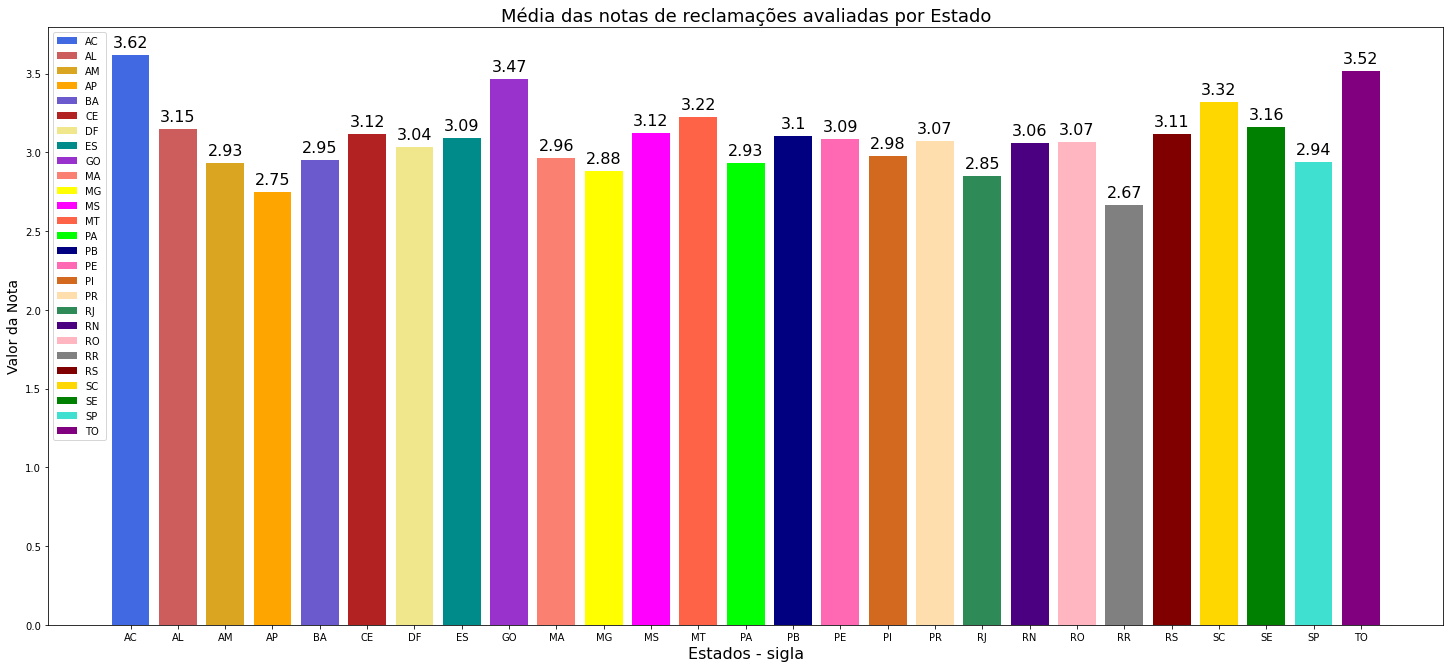

In [11]:
# Resposta questão 6b: 

# Relação de notas de reclamações avaliadas por Estado

fig = plt.figure()

reclamacoes_avaliados = df[~df['Nota do Consumidor'].isnull()]
temp_total = pd.DataFrame(reclamacoes_avaliados.groupby(['UF'])['Total'].count()).reset_index()
temp = pd.DataFrame(reclamacoes_avaliados.groupby(['UF'])['Nota do Consumidor'].sum()).reset_index()
temp = temp.merge(temp_total, on=['UF'])
temp['Media de nota do Cosumidor'] = temp['Nota do Consumidor']  / temp['Total']


estados = list(temp.UF)
notas =  list(temp['Media de nota do Cosumidor'])    

cores = ['royalblue', 'indianred', 'goldenrod', 'orange', 'slateblue', 'firebrick', 'khaki', 'darkcyan', 
         'darkorchid', 'salmon', 'yellow', 'fuchsia', 'tomato', 'lime', 'navy', 'hotpink', 'chocolate', 'navajowhite',
         'seagreen', 'indigo', 'lightpink', 'grey', 'maroon', 'gold', 'g', 'turquoise', 'purple']

for coluna in range(len(estados)):
        plt.text(coluna, notas[coluna] + 0.05, round(notas[coluna],2), ha = 'center', fontsize=16)
        plt.bar(estados[coluna], notas[coluna], color = cores[coluna], label = estados[coluna])
        plt.legend(loc='upper left') 


plt.xticks(estados)
fig.set_figheight(11)
fig.set_figwidth(25) 
plt.title('Média das notas de reclamações avaliadas por Estado', fontsize=18)
plt.xlabel('Estados - sigla', fontsize=16)
plt.ylabel('Valor da Nota', fontsize=14)


plt.show()

## Laudo 6b: 
### Calculando a média de notas do consumidor, num espectro de 1 a 5, por estado, descartando os atendimentos sem avaliação pelo cliente, conseguimos visualizar qual dos estados teve a melhor média de atendimento, sendo os campeões Acre (AC) com média 3,62, Tocantins (TO) com média 3,52 e Goiás (GO) com 3,47. Roraima (RR) teve a pior média nesta análise com 2,67 de nota média.